In [1]:
#!pip install pykrx

In [2]:
import pykrx
#help(pykrx)  

In [3]:
# 1. 데이터 소개
from pykrx import stock

# bond도 가능함
# from pykrx import bond

# https://github.com/sharebook-kr/pykrx

# tickers = stock.get_market_ticker_list(조회일자(YYYYmmdd) [,market=조회할 시장(KOSPI, KOSDAQ, ALL])
# name = get_market_ticker_name(심볼 [,market=조회할 시장(KOSPI, KOSDAQ, ALL])
# ohlcv = stock.stock.get_market_ohlcv(조회일자(YYYYmmdd) [,앞에 시작일을 넣었다면 종료일] [,심볼] )

# 예시
#tickers = stock.get_market_ticker_list("20220222", market="KOSPI") # 코스피 종목 리스트
#name = stock.get_market_ticker_name("005930") # 심볼 -> 기업 이름
#ohlcv = stock.get_market_ohlcv("20220222", market="KOSPI") # 특정일 코스피 종목들의 OHLCV
raw = stock.get_market_ohlcv('20221229', '20231231', '005930') # 특정기간 특정 종목의 OHLCV : 'm' 등 옵션 존재.

In [ ]:
print(len(raw))
raw.head()
type(raw)

246


pandas.core.frame.DataFrame

In [22]:
# 2. 수익률 계산하기
import pandas as pd
import numpy as np
df=pd.DataFrame(raw[['종가']])
df.head()

,종가
날짜,
2022-12-29,75000
2023-01-02,75700
2023-01-03,75600
2023-01-04,81000
2023-01-05,81400


In [23]:
df = df.rename(columns={'종가':'close'})
df.head()

,close
날짜,
2022-12-29,75000
2023-01-02,75700
2023-01-03,75600
2023-01-04,81000
2023-01-05,81400


In [27]:
df['return'] = np.log(df['close']/df['close'].shift(1))
df.head()

,close,return
날짜,,
2022-12-29,75000,NaN
2023-01-02,75700,0.009290
2023-01-03,75600,-0.001322
2023-01-04,81000,0.068993
2023-01-05,81400,0.004926


In [28]:
# 3. 12월 29일 종가를 기준으로 향후 251일 이후의 수익률 부트스트래핑
expect = np.random.choice(df['return'][1:], size = 251)
list(expect)
# 불확실성이 실현된!

[0.03335559370088325,
 0.007790801787768223,
 0.044164420008634644,
 -0.012325085992620118,
 0.010022862948652084,
 -0.00865057297600882,
 -0.01351371916672282,
 -0.02737553330017249,
 0.007851975282685391,
 0.031051339832050398,
 -0.012931214672248779,
 -0.010520260674179278,
 -0.005685063634608306,
 0.040124887486099256,
 0.010022862948652084,
 0.0051063940745740555,
 -0.0011954574047737456,
 0.0078023802841848,
 -0.01974247872920115,
 0.0078023802841848,
 0.005341485420333782,
 -0.02170627858186306,
 0.021978906718775167,
 0.01648627361704588,
 -0.017586384502075867,
 -0.02170627858186306,
 0.012054940505353898,
 -0.01351371916672282,
 -0.007639456557957614,
 -0.005282632464427224,
 0.03960913809504588,
 0.020690393257446246,
 0.02712030621919382,
 0.01916434958921572,
 0.001166180890182394,
 0.0016792615197199939,
 -0.010520260674179278,
 -0.021555003561829697,
 0.010022862948652084,
 0.017798022644327213,
 -0.00867308125342878,
 0.019342962843130935,
 0.018329354121905013,
 0.0040

In [95]:
# 4. 각 행의 값을 직전의 종가에 곱하여 251일의 에측 종가를 만들기

# 로그를 취했으므로 누적합에 exp를 취하자.

In [36]:
fclose = [75000]
rlst = list(np.exp(np.cumsum(expect)))
for i in range(len(rlst)) :
    fclose.append(fclose[0]*rlst[i])
fclose

[75000,
 77543.85964912281,
 78150.34793688131,
 81679.163207159,
 80678.63893624724,
 81491.33584860871,
 80789.42942441741,
 79705.00755294874,
 77552.63604097038,
 78163.9743881402,
 80629.14588807385,
 79593.22538415855,
 78760.27302548713,
 78313.78621695262,
 81520.01265614839,
 82341.18494480923,
 82762.72684725706,
 82663.84664791744,
 83311.34414124316,
 81682.70132344443,
 82322.51360535128,
 82763.41459635163,
 80986.28606207414,
 82785.98130789802,
 84162.12622902667,
 82694.957625985,
 80919.29902665404,
 81900.67972047234,
 80801.34173764722,
 80186.41524040485,
 79763.93676179365,
 82986.72208550248,
 84721.63613607048,
 87050.7532807047,
 88735.11262298748,
 88838.65417797345,
 88987.96284045743,
 88056.69346189452,
 86178.94130052975,
 87047.0441890882,
 88610.1785404074,
 87844.97838030026,
 89560.70061429052,
 91217.4273938802,
 91584.6473109248,
 92997.26397895964,
 97031.3918684579,
 101412.76528983099,
 102579.460819714,
 98846.21327954244,
 96170.31086918568,
 95

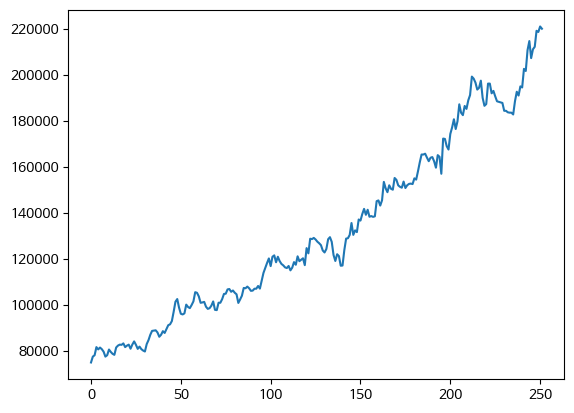

In [37]:
# 5. 251일의 주가 흐름을 line plot으로 그려보기
import matplotlib as plt
plt.pyplot.plot(fclose)

In [ ]:
# 6. 해당 시행을 1000번, 10000번 반복하여 251일째 (즉, 대략적인 영업일 기준 2023년 12월 31일)의 예측 종가를 히스토그램으로 그려보기 /

In [43]:
##100회
rlst_100 = []
for i in range(0,100) :
    expect = np.exp(np.cumsum(np.random.choice(df['return'][1:], size = 251)))[-1]
    rlst_100.append(expect*75000)

(array([ 3., 15., 23., 18., 21.,  7.,  4.,  3.,  4.,  2.]),
 array([ 53139.65398002,  80226.73601198, 107313.81804394, 134400.9000759 ,
        161487.98210786, 188575.06413982, 215662.14617178, 242749.22820374,
        269836.3102357 , 296923.39226766, 324010.47429962]),
 <BarContainer object of 10 artists>)

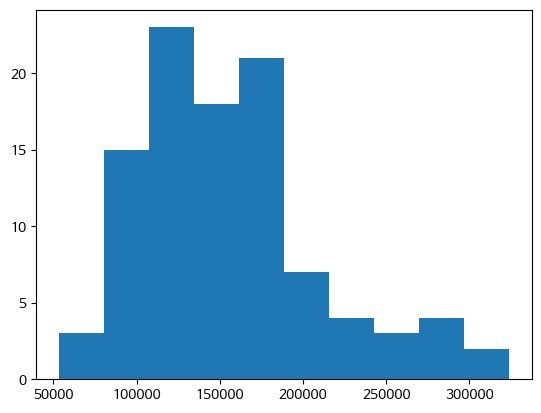

In [44]:
plt.pyplot.hist(rlst_100)

In [48]:
##1000회
rlst_1000 = []
for i in range(0,1000) :
    expect = np.exp(np.cumsum(np.random.choice(df['return'][1:], size = 251)))[-1]
    rlst_1000.append(expect*75000)

(array([ 67., 240., 295., 194., 112.,  53.,  23.,  10.,   4.,   2.]),
 array([ 45474.60693356,  82526.39018077, 119578.17342798, 156629.95667518,
        193681.73992239, 230733.52316959, 267785.3064168 , 304837.089664  ,
        341888.87291121, 378940.65615841, 415992.43940562]),
 <BarContainer object of 10 artists>)

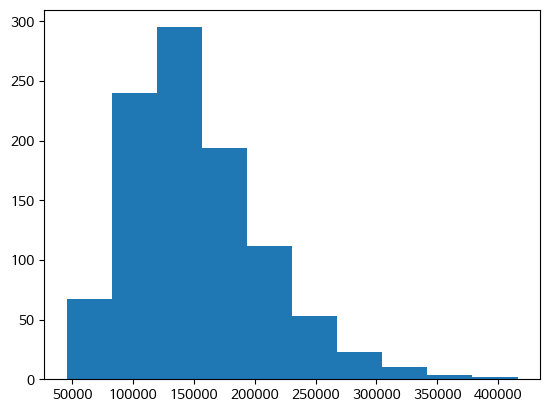

In [49]:
plt.pyplot.hist(rlst_1000)

## 추가 연구 : SK하이닉스 조사(최초 제출본 수정)

In [10]:
raw = stock.get_market_ohlcv('20221229', '20231231', '000660') 
print(len(raw))
raw.head()

246


,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2022-12-29,75200,75600,74700,75000,1736661,-1.315789
2023-01-02,75100,76700,75000,75700,1376985,0.933333
2023-01-03,75600,76300,73100,75600,2719437,-0.132100
2023-01-04,75400,81900,75200,81000,5154609,7.142857
2023-01-05,83300,83300,80800,81400,3510964,0.493827


In [12]:
df = pd.DataFrame(raw[['종가', '등락률']])
df = df.rename(columns={'종가':'close', '등락률':'updown'})
df['return'] = 1 + df['updown']/100
df.head()
#이와 같이 정의할 경우, 로그를 사용하지 않고 return을 직접 곱해야 적절한 답이 나온다.

,close,updown,return
날짜,,,
2022-12-29,75000,-1.315789,0.986842
2023-01-02,75700,0.933333,1.009333
2023-01-03,75600,-0.132100,0.998679
2023-01-04,81000,7.142857,1.071429
2023-01-05,81400,0.493827,1.004938


In [13]:
rlst = []
for i in range(0,251) : 
    sn = np.random.randint(1, 246)
    rlst.append(df['return'][sn])

fclose = [75000]
for i in range(0, len(rlst)) :
    fclose.append(fclose[i]*rlst[i])
fclose[-1]

C:\Users\Na\AppData\Local\Temp\ipykernel_33932\4086889925.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rlst.append(df['return'][sn])


135684.7637217309

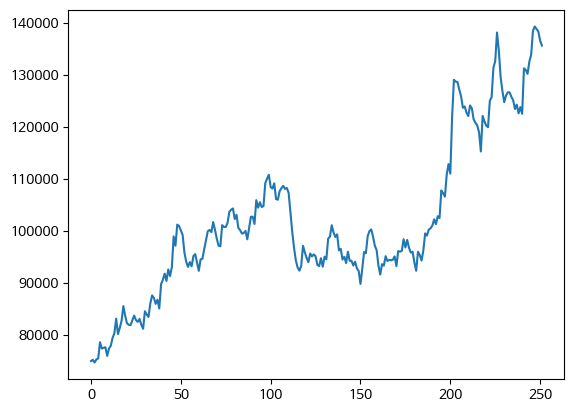

In [16]:
plt.pyplot.plot(fclose)

In [17]:
#100회 

lst_100 = []
for j in range(0, 100) :
    rlst = []
    for i in range(0,251) : 
        sn = np.random.randint(1, 246)
        rlst.append(df['return'][sn])
    fclose = [75000]
    for i in range(0, len(rlst)) :
        fclose.append(fclose[i]*rlst[i])
    lst_100.append(fclose[-1])

C:\Users\Na\AppData\Local\Temp\ipykernel_33932\3628509740.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rlst.append(df['return'][sn])


(array([ 6., 15., 18., 25., 12., 13.,  5.,  3.,  1.,  2.]),
 array([ 48140.94544512,  76288.13150632, 104435.31756752, 132582.50362872,
        160729.68968992, 188876.87575112, 217024.06181232, 245171.24787352,
        273318.43393472, 301465.61999592, 329612.80605712]),
 <BarContainer object of 10 artists>)

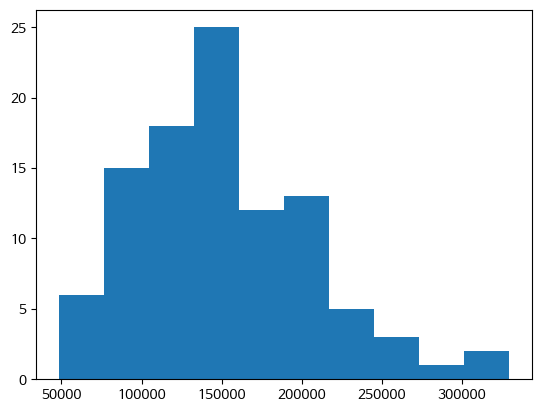

In [18]:
plt.pyplot.hist(lst_100)

In [19]:
##1000회

lst_1000 = []
for j in range(0, 1000) :
    rlst = []
    for i in range(0,251) : 
        sn = np.random.randint(1, 246)
        rlst.append(df['return'][sn])
    fclose = [75000]
    for i in range(0, len(rlst)) :
        fclose.append(fclose[i]*rlst[i])
    lst_1000.append(fclose[-1])

C:\Users\Na\AppData\Local\Temp\ipykernel_33932\1788237517.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rlst.append(df['return'][sn])


(array([ 99., 359., 321., 125.,  69.,  24.,   1.,   0.,   1.,   1.]),
 array([ 44171.32814766,  91448.57051982, 138725.81289199, 186003.05526415,
        233280.29763631, 280557.54000847, 327834.78238064, 375112.0247528 ,
        422389.26712496, 469666.50949712, 516943.75186929]),
 <BarContainer object of 10 artists>)

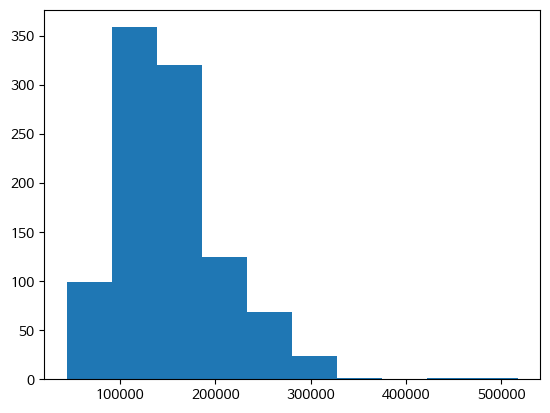

In [20]:
plt.pyplot.hist(lst_1000)

time 측면에서의 퍼포먼스는 앞의 코드가 이 코드보다 훨씬 낫다. 지속적으로 곱해 저장하는 과정, for 구문 내에서 이중 for가 쓰인 것이 영향을 미친 것으로 보인다.

In [ ]:
# 기타 지표 수집법 (다만, 이 지표는 아직까지 검증이 좀 필요함)
fs = stock.get_market_fundamental("20220101", "20221231", "005930")
fs.tail()
# BPS: Book value Per Share : 주당순자산
# PER: Price Earning Ratio : 주가수익비율
# PBR: Price on Book-value Ratio : 주가순자산비율
# EPS: Earning Per Share : 주당순이익
# DIV: Dividend : 배당수익률
# DPS: Dividend Per Share : 주당배당금

In [ ]:
# 
df = stock.get_market_trading_value_by_date("20220101", "20221231", "005930", on="매수")
df.tail()

In [ ]:
# 기타 국내외 주식정보 수집
import FinanceDataReader as fdr

# fdr.DataReader(주식 종목 [, 시작일(YYYY-mm-dd)] [,종료일(YYYY-mm-dd)])
# fdr.StockListing(거래소이름("SSE", "SZSE", ...))

samsung = fdr.DataReader("005930")
samsung_period = fdr.DataReader("005930", "2022-01-01", "2022-12-31")
samsung_year = fdr.DataReader("005930", "2021")

# 뉴욕거래소 전체
NYSE_df = fdr.StockListing('NYSE') 

In [ ]:
NYSE_df.tail()

In [ ]:
samsung_period.head()

In [ ]:
# yahoo finance 사용 - 해외특화
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
# yf의 메소드를 재정의해줌(이 부분이 필요!)

# df = pdr.get_data_yahoo(주식 종목(한국주식의 경우 ".KS") [, 시작일(YYYY-mm-dd)] [,종료일(YYYY-mm-dd)])

# 예시
df = pdr.get_data_yahoo("AAPL", "2022-01-01", "2022-12-31")

df